In [33]:
import pandas as pd
import numpy as np
from sklearn import datasets
from matplotlib import pyplot
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
#new tricks
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.metrics import r2_score
from sklearn.utils import shuffle

In [34]:
data = datasets.load_breast_cancer() #load the data

In [35]:
data['data']

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [36]:
cancer_df = pd.DataFrame(data=np.c_[data['data'], data['target']],columns= list(data['feature_names']) + ['target']) #put it data frame
display(cancer_df)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In [37]:
cancer_df.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,-0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,-0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,-0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,-0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,-0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,-0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,-0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,-0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,-0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,0.012838


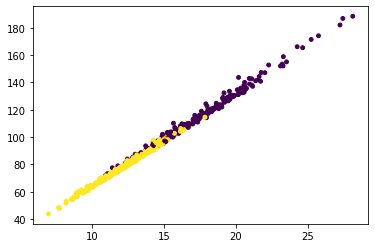

In [38]:
pyplot.scatter(x=data['data'][::,0], y=data['data'][::,2], s=15, c=data['target'] ) #corr = 0.997855 (good)

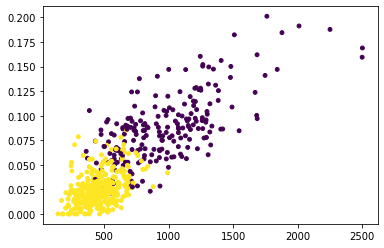

In [39]:
pyplot.scatter(x=data['data'][::,3], y=data['data'][::,7], s=15, c=data['target'] ) # corr = 0.823269

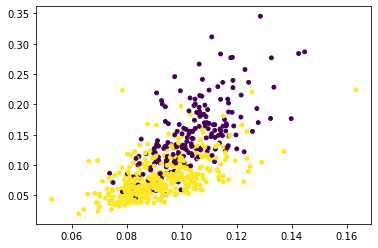

In [40]:
pyplot.scatter(x=data['data'][::,4], y=data['data'][::,5], s=15, c=data['target'] ) # corr = 0.659123

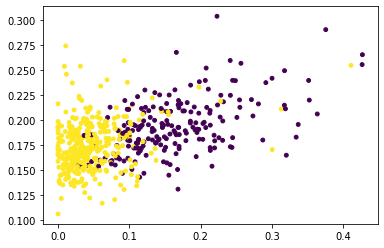

In [41]:
pyplot.scatter(x=data['data'][::,6], y=data['data'][::,8], s=15, c=data['target'] ) # corr = 0.500667

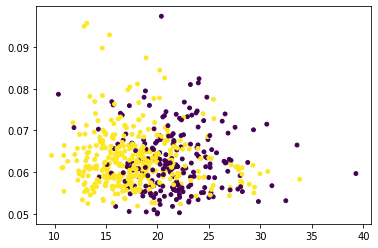

In [42]:
pyplot.scatter(x=data['data'][::,1], y=data['data'][::,9], s=15, c=data['target'] ) # corr = -0.076437 (bad)

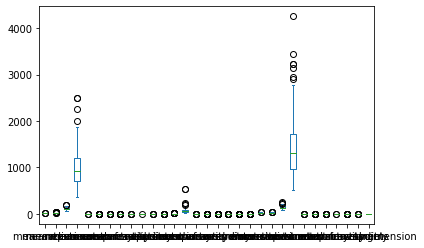

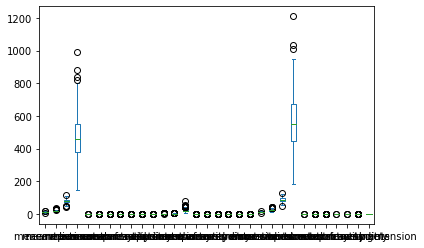

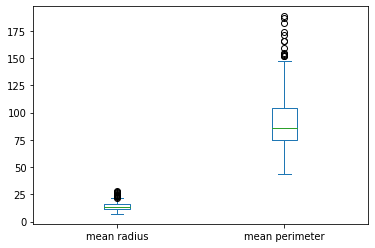

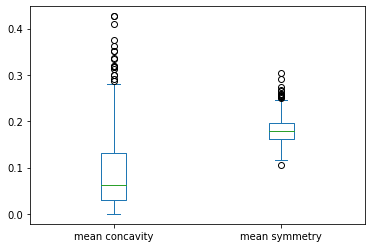

In [43]:
cancer_df[cancer_df['target']==0].plot.box()   
cancer_df[cancer_df['target']==1].plot.box() 
cancer_df[['mean radius','mean perimeter']].plot.box()
cancer_df[['mean concavity','mean symmetry']].plot.box()



In [44]:
train_df, test_df = train_test_split(cancer_df) #automatic shuffle 


In [62]:
tree = DecisionTreeClassifier(max_depth=5)

tree.fit(train_df.drop('target', axis=1), train_df['target'])  # fitting features and target

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


DecisionTreeClassifier(max_depth=5)

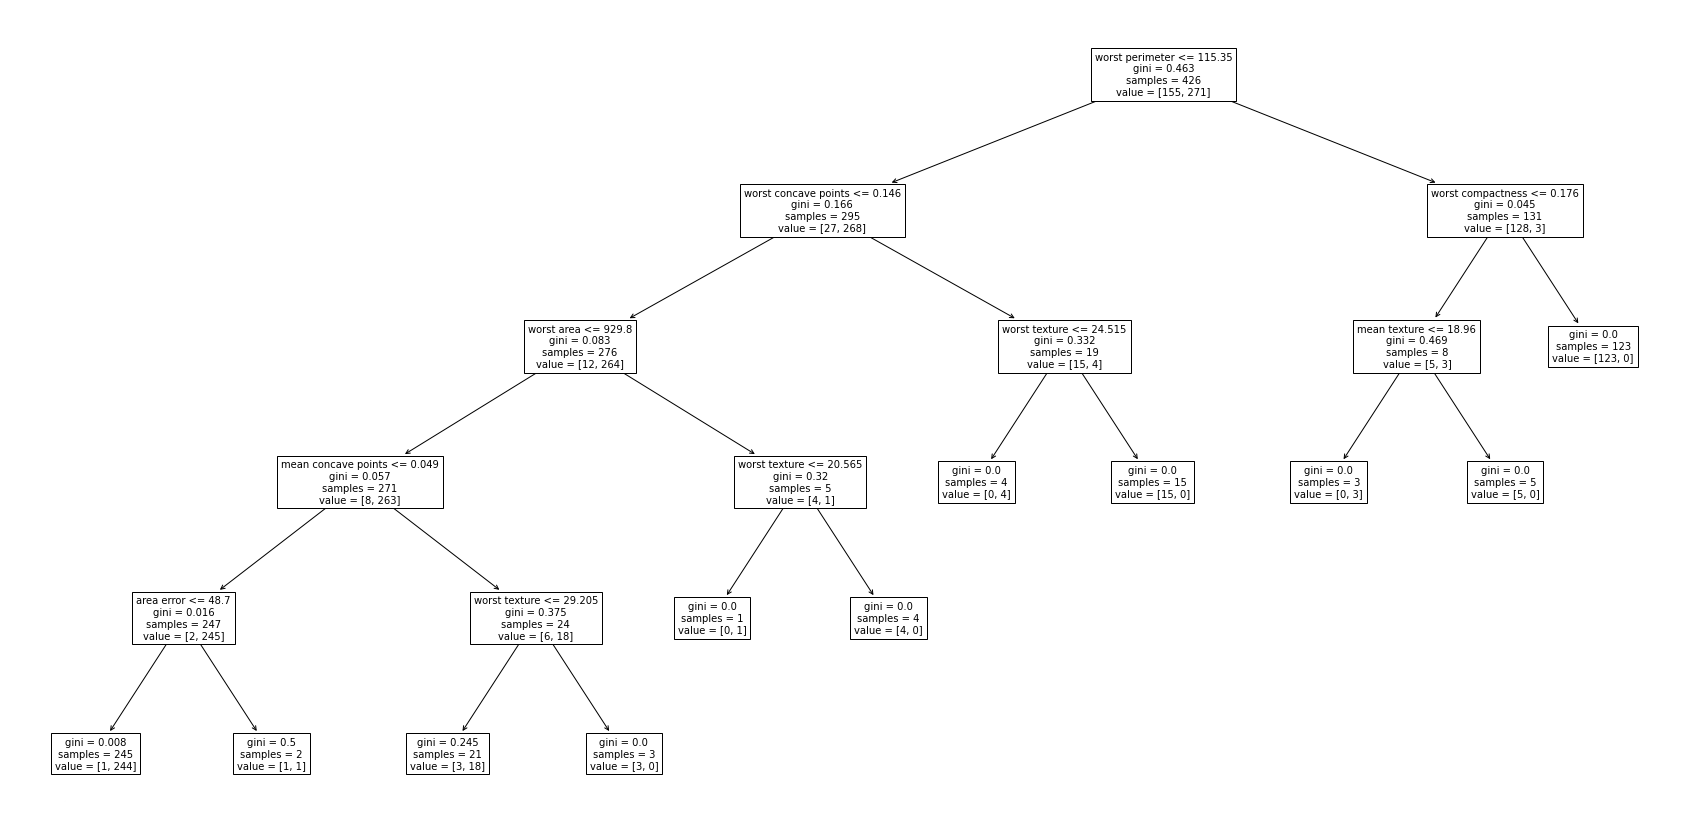

In [63]:
from sklearn import tree as tr
pyplot.figure(figsize=(30,15))
tr.plot_tree(tree, feature_names=data['feature_names'], fontsize=10)
pyplot.show()

In [61]:
#What are the top 5 most important (discriminative) features?
list1 =tree.feature_importances_

list2 = data['feature_names']

list1, list2 = zip(*sorted(zip(list1, list2))) #according the importance sort, this statement sorts the feature_names
print('Top 5 most important (discriminative) features:')
index =-1
for i in range(5):
    print(i+1, '-', list2[index])
    index -=1



Top 5 most important (discriminative) features:
1 - radius error
2 - mean texture
3 - mean compactness
4 - mean concave points
5 - mean symmetry


In [48]:
lr = LogisticRegression(C=0.01, max_iter=1000)
lr.fit(train_df.drop(['target'], axis=1),train_df['target']) 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


LogisticRegression(C=0.01, max_iter=1000)

In [64]:
# Test data score
print('tree test score:')
print(tree.score(test_df.drop('target',axis=1), test_df['target']))
# Test data score
print('logistic regression test score: ')
print(lr.score(test_df.drop('target',axis=1), test_df['target']))

tree test score:
0.9300699300699301
logistic regression test score: 
0.9370629370629371


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str_']. An error will be raised in 1.2.
  FutureWarning,


In [50]:
from google.colab import files
#uploaded = files.upload()
df = pd.read_csv('winequality_white.csv', sep = ';')
df.rename(columns = {'quality' : 'target'}, inplace = True)


In [51]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,target
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [72]:

X= df.drop('target', axis=1)
y = df['target']
X_wine_train, X_wine_test, y_wine_train, y_wine_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [73]:


from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

param_grid = [
  {'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10],
   'max_depth': [ 20, 22, 24, 26, 28, 30],
   'criterion': ['gini', 'entropy']},
 ]

clf = GridSearchCV(tree, param_grid, cv=5)  
clf.fit(X_wine_train, y_wine_train)


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_split.py:680: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  UserWarning,


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=5),
             param_grid=[{'criterion': ['gini', 'entropy'],
                          'max_depth': [20, 22, 24, 26, 28, 30],
                          'min_samples_split': [2, 3, 4, 5, 6, 7, 8, 10]}])

In [74]:
clf.best_params_

{'criterion': 'entropy', 'max_depth': 22, 'min_samples_split': 2}

In [75]:
tree_regressor = DecisionTreeRegressor(max_depth = 22, min_samples_split=2 )
tree_regressor.fit(X_wine_train, y_wine_train)
y_wine_predict = tree_regressor.predict(X_wine_test)

In [76]:
from sklearn.metrics import mean_squared_error as MSE
mean_squared_err = MSE(y_wine_predict, y_wine_test)
print(mean_squared_err)

0.6897467136218376
